In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [4]:
load = pd.read_csv("time_series_60min_singleindex.csv", parse_dates=["utc_timestamp"])
weather = pd.read_csv("weather_data.csv", parse_dates=["utc_timestamp"])

In [5]:
load.shape

(50401, 300)

In [6]:
weather.shape

(350640, 85)

In [7]:
load.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [8]:
weather.head()

,utc_timestamp,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
0,1980-01-01 00:00:00+00:00,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,...,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1,1980-01-01 01:00:00+00:00,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,...,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
2,1980-01-01 02:00:00+00:00,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,...,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
3,1980-01-01 03:00:00+00:00,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,...,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
4,1980-01-01 04:00:00+00:00,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,...,0.0,-4.239,0.0,0.0,-4.732,0.0,0.0,-4.449,0.0,0.0


In [9]:
load_cols = ["utc_timestamp"] + [c for c in load.columns if "_load_actual" in c]
load = load[load_cols]


In [10]:
weather_cols = ["utc_timestamp"] + [
    c for c in weather.columns 
    if "temperature" in c or "radiation_direct" in c
]
weather = weather[weather_cols]


In [11]:
load_long = load.melt(
    id_vars=["utc_timestamp"],
    var_name="country",
    value_name="load"
)

load_long["country"] = load_long["country"].str.split("_").str[0]
load_long.head()


,utc_timestamp,country,load
0,2014-12-31 23:00:00+00:00,AT,NaN
1,2015-01-01 00:00:00+00:00,AT,5946.0
2,2015-01-01 01:00:00+00:00,AT,5726.0
3,2015-01-01 02:00:00+00:00,AT,5347.0
4,2015-01-01 03:00:00+00:00,AT,5249.0


In [12]:
weather_long = weather.melt(
    id_vars=["utc_timestamp"],
    var_name="feature",
    value_name="value"
)

weather_long["country"] = weather_long["feature"].str[:2]
weather_long["feature"] = weather_long["feature"].str[3:]

weather_long = weather_long.pivot_table(
    index=["utc_timestamp", "country"],
    columns="feature",
    values="value"
).reset_index()

weather_long.head()


feature,utc_timestamp,country,radiation_direct_horizontal,temperature
0,1980-01-01 00:00:00+00:00,AT,0.0,-3.640
1,1980-01-01 00:00:00+00:00,BE,0.0,-0.720
2,1980-01-01 00:00:00+00:00,BG,0.0,4.664
3,1980-01-01 00:00:00+00:00,CH,0.0,-6.287
4,1980-01-01 00:00:00+00:00,CZ,0.0,-3.422


In [13]:
data = load_long.merge(
    weather_long,
    on=["utc_timestamp", "country"],
    how="inner"
)

data = data.sort_values(["country", "utc_timestamp"]).reset_index(drop=True)
data.head(), data.shape


(              utc_timestamp country    load  radiation_direct_horizontal  \
 0 2014-12-31 23:00:00+00:00      AT     NaN                          0.0   
 1 2015-01-01 00:00:00+00:00      AT  5946.0                          0.0   
 2 2015-01-01 01:00:00+00:00      AT  5726.0                          0.0   
 3 2015-01-01 02:00:00+00:00      AT  5347.0                          0.0   
 4 2015-01-01 03:00:00+00:00      AT  5249.0                          0.0   
 
    temperature  
 0       -6.495  
 1       -6.503  
 2       -6.458  
 3       -6.253  
 4       -5.908  ,
 (2322725, 5))

In [14]:
data.isna().mean().sort_values().tail(10)


utc_timestamp                  0.000000
country                        0.000000
radiation_direct_horizontal    0.000000
temperature                    0.000000
load                           0.015745
dtype: float64

In [15]:
data.isnull().sum()

utc_timestamp                      0
country                            0
load                           36572
radiation_direct_horizontal        0
temperature                        0
dtype: int64

In [16]:
data = data.dropna(subset=["load"]).reset_index(drop=True)


In [17]:
data.isnull().sum()


utc_timestamp                  0
country                        0
load                           0
radiation_direct_horizontal    0
temperature                    0
dtype: int64

In [18]:
data = data.dropna(subset=["load"]).reset_index(drop=True)


In [19]:
data

,utc_timestamp,country,load,radiation_direct_horizontal,temperature
0,2015-01-01 00:00:00+00:00,AT,5946.0,0.0,-6.503
1,2015-01-01 01:00:00+00:00,AT,5726.0,0.0,-6.458
2,2015-01-01 02:00:00+00:00,AT,5347.0,0.0,-6.253
3,2015-01-01 03:00:00+00:00,AT,5249.0,0.0,-5.908
4,2015-01-01 04:00:00+00:00,AT,5309.0,0.0,-5.516
...,...,...,...,...,...
2286148,2019-12-31 19:00:00+00:00,SK,3080.0,0.0,-0.766
2286149,2019-12-31 20:00:00+00:00,SK,2986.0,0.0,-0.742
2286150,2019-12-31 21:00:00+00:00,SK,2965.0,0.0,-0.764
2286151,2019-12-31 22:00:00+00:00,SK,2980.0,0.0,-0.867


In [20]:
data.sample(20)

,utc_timestamp,country,load,radiation_direct_horizontal,temperature
203429,2018-03-25 09:00:00+00:00,CZ,8208.63,562.6480,4.951
1927423,2019-01-03 16:00:00+00:00,PT,7122.80,52.7464,11.103
1610642,2015-06-17 05:00:00+00:00,NO,2366.99,9.6999,7.402
42904,2019-11-23 16:00:00+00:00,AT,7918.00,0.0000,5.747
2085386,2017-06-02 02:00:00+00:00,SE,1770.00,4.3759,6.219
1771189,2018-07-09 07:00:00+00:00,NO,3464.43,124.2649,13.236
2145888,2018-10-19 07:00:00+00:00,SE,1109.00,40.8560,5.468
1058662,2017-04-30 12:00:00+00:00,IE,4111.00,178.4326,11.702
2222524,2017-09-26 17:00:00+00:00,SI,1870.84,0.0000,12.017
1898194,2015-09-03 19:00:00+00:00,PT,6364.30,0.0718,18.239


In [21]:
data["hour"] = data["utc_timestamp"].dt.hour
data["dayofweek"] = data["utc_timestamp"].dt.dayofweek
data["month"] = data["utc_timestamp"].dt.month
data["is_weekend"] = (data["dayofweek"] >= 5).astype(int)


In [22]:
corr = data[["load","temperature","radiation_direct_horizontal",
             "hour","dayofweek","month"]].corr()

corr


,load,temperature,radiation_direct_horizontal,hour,dayofweek,month
load,1.000000,0.037413,0.032130,0.034987,-0.040407,-0.013605
temperature,0.037413,1.000000,0.509188,0.062872,0.004772,0.222356
radiation_direct_horizontal,0.032130,0.509188,1.000000,-0.065057,-0.002172,-0.030930
hour,0.034987,0.062872,-0.065057,1.000000,0.000130,-0.000105
dayofweek,-0.040407,0.004772,-0.002172,0.000130,1.000000,0.002166
month,-0.013605,0.222356,-0.030930,-0.000105,0.002166,1.000000


In [23]:
data["lag_1"]  = data.groupby("country")["load"].shift(1)
data["lag_24"] = data.groupby("country")["load"].shift(24)

data["roll_24"] = (
    data.groupby("country")["load"].rolling(24).mean().reset_index(0,drop=True)
)

data["roll_72"] = (
    data.groupby("country")["load"].rolling(72).mean().reset_index(0,drop=True)
)

data = data.dropna().reset_index(drop=True)


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284165 entries, 0 to 2284164
Data columns (total 13 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   utc_timestamp                datetime64[ns, UTC]
 1   country                      object             
 2   load                         float64            
 3   radiation_direct_horizontal  float64            
 4   temperature                  float64            
 5   hour                         int32              
 6   dayofweek                    int32              
 7   month                        int32              
 8   is_weekend                   int32              
 9   lag_1                        float64            
 10  lag_24                       float64            
 11  roll_24                      float64            
 12  roll_72                      float64            
dtypes: datetime64[ns, UTC](1), float64(7), int32(4), object(1)
memory usage:

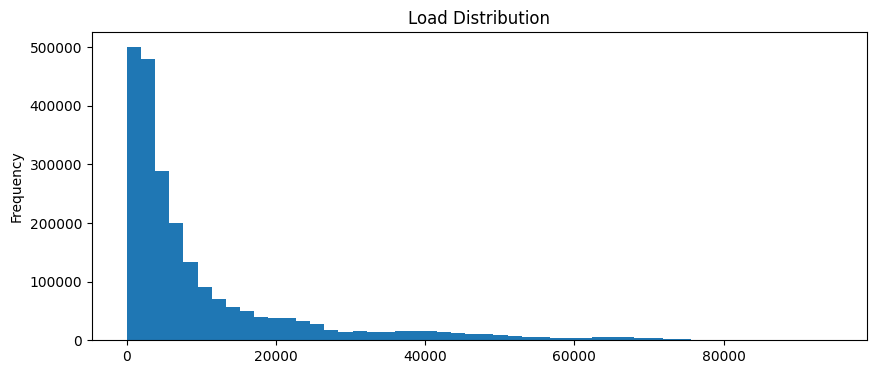

In [25]:
data["load"].plot(kind="hist", bins=50, figsize=(10,4), title="Load Distribution");


📌 1️⃣ Load Distribution (Highly Right-Skewed)

What we see:

Most values cluster below ~15,000 MW

A long tail goes up to ~80,000+

👉 Interpretation:

A few countries + extreme events push demand very high

Data is not symmetric — but that’s normal for energy systems

Model impact

Consider robust metrics (MAE, MAPE)

Maybe log-transform for certain models later (optional)


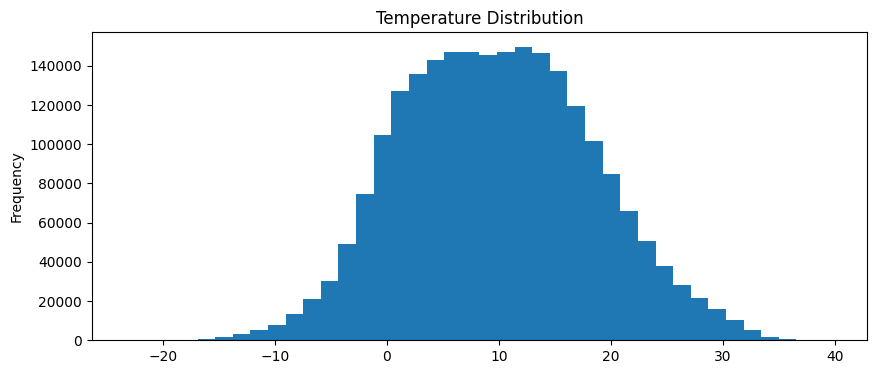

In [26]:
data["temperature"].plot(kind="hist", bins=40, figsize=(10,4),
                         title="Temperature Distribution");


🌡 2️⃣ Temperature Distribution (Almost Normal)

What we see:

Bell-shaped curve from −20°C → 35°C

Centered around 10–12°C

👉 Interpretation:

Balanced seasonal coverage — good signal for learning heating/cooling effects

Model impact

Strong continuous predictor

Expect nonlinear effects

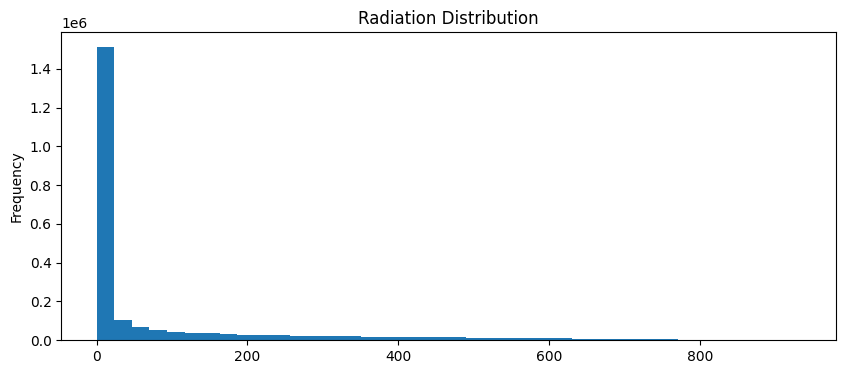

In [27]:
data["radiation_direct_horizontal"].plot(kind="hist", bins=40, figsize=(10,4),
                                         title="Radiation Distribution");


☀ 3️⃣ Radiation Distribution (Mostly Zero, Big Tail)

What we see:

Huge spike at 0 (nighttime)

Spread across daytime values

👉 Interpretation:

Distinguishes night vs day

Indicates sunlight intensity

Model impact

Good feature

Works well with hour and month

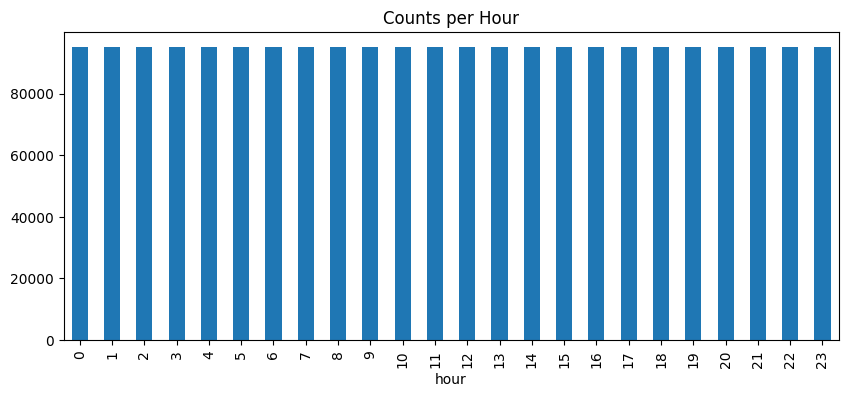

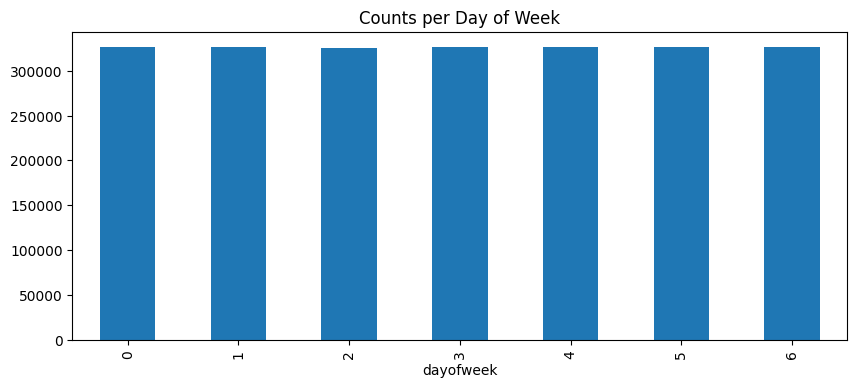

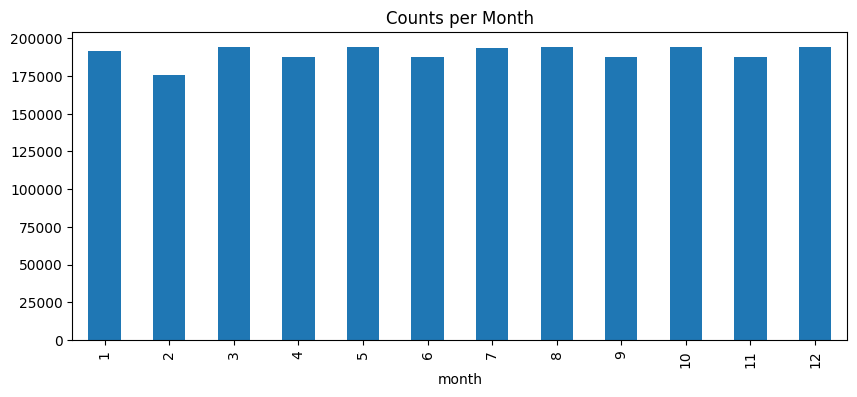

In [28]:
data["hour"].value_counts().sort_index().plot(kind="bar", figsize=(10,4),
                                              title="Counts per Hour");
plt.show()
data["dayofweek"].value_counts().sort_index().plot(kind="bar", figsize=(10,4),
                                                   title="Counts per Day of Week");
plt.show()
data["month"].value_counts().sort_index().plot(kind="bar", figsize=(10,4),
                                               title="Counts per Month");
plt.show()

⏰ 4️⃣ Time Count Charts — Perfectly Balanced

Hours are evenly represented

Days of week are balanced

Months are almost balanced

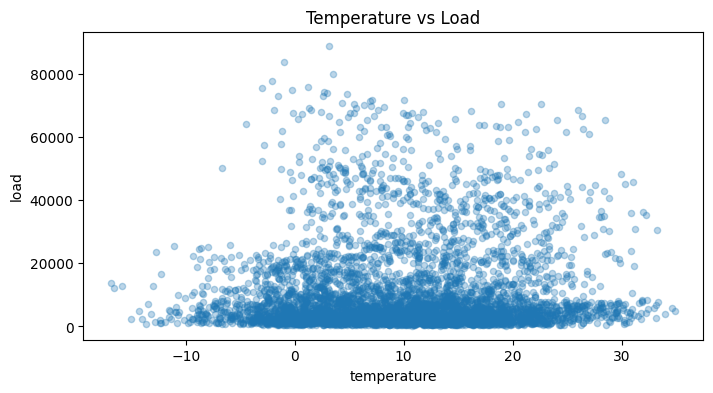

In [29]:
data.sample(5000).plot.scatter(x="temperature", y="load",
                               alpha=0.3, figsize=(8,4),
                               title="Temperature vs Load");


relationships
🌡 Temperature vs Load

Scatter looks messy — but that’s expected.

Why?

You’re mixing:

many countries

different climates

seasons

industrial demand differences

But underneath it, we usually get:

U-shape behavior
Cold → heating ↑
Hot → A/C ↑
Mild → lowest load

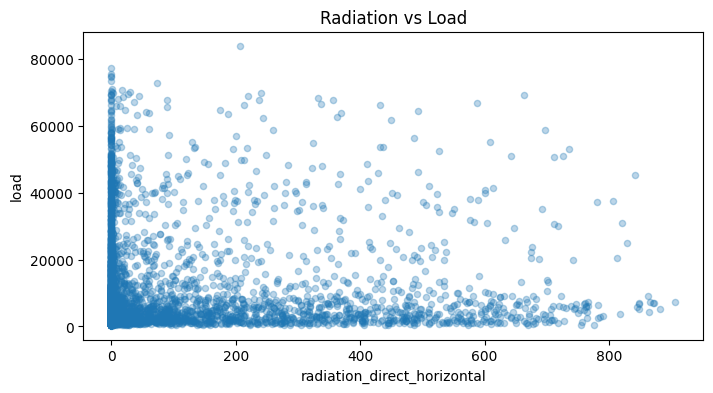

In [30]:
data.sample(5000).plot.scatter(x="radiation_direct_horizontal", y="load",
                               alpha=0.3, figsize=(8,4),
                               title="Radiation vs Load");


☀ Radiation vs Load

Graph interpretation:

Dense vertical wall at radiation ≈ 0 ⟶ nighttime

Daytime load spreads across wide range

👉 Meaning:

Radiation affects load indirectly (through sunlight, activity, solar generation)

It interacts with hour + month

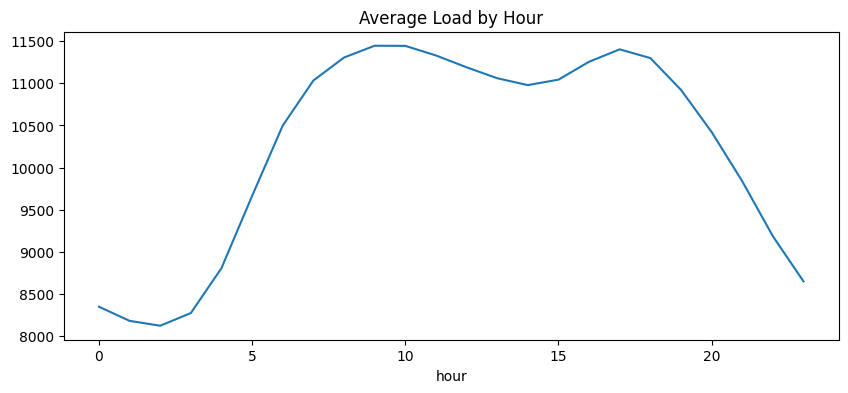

In [31]:
data.groupby("hour")["load"].mean().plot(figsize=(10,4),
                                         title="Average Load by Hour");


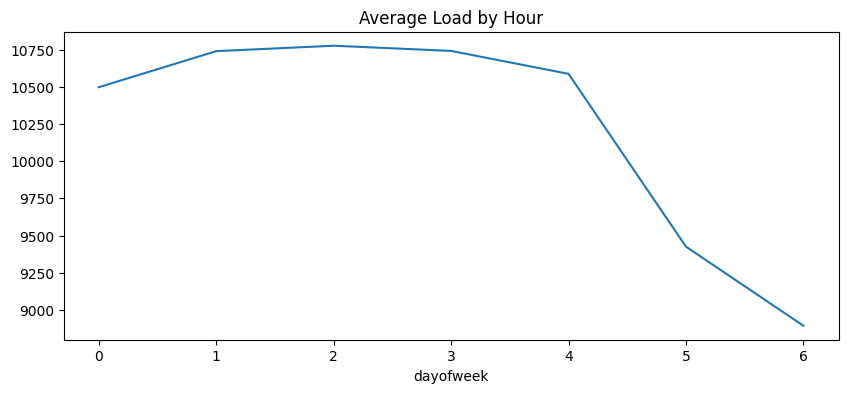

In [32]:
data.groupby("dayofweek")["load"].mean().plot(figsize=(10,4),
                                         title="Average Load by Hour");


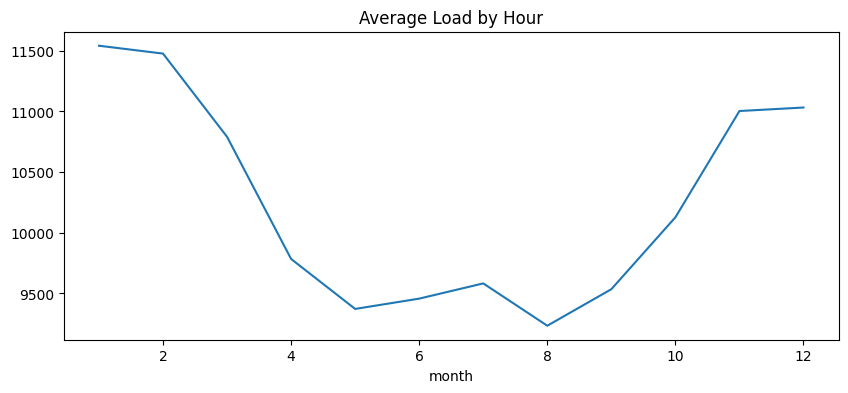

In [33]:
data.groupby("month")["load"].mean().plot(figsize=(10,4),
                                         title="Average Load by Hour");


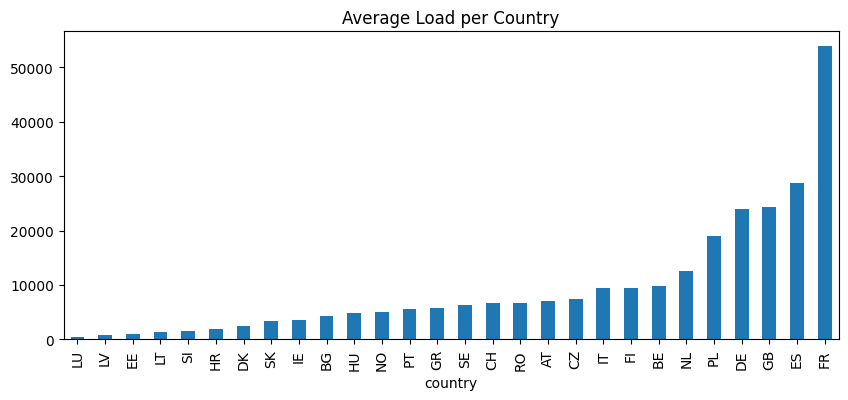

In [34]:
data.groupby("country")["load"].mean().sort_values().plot(kind="bar", figsize=(10,4),
                                                          title="Average Load per Country");


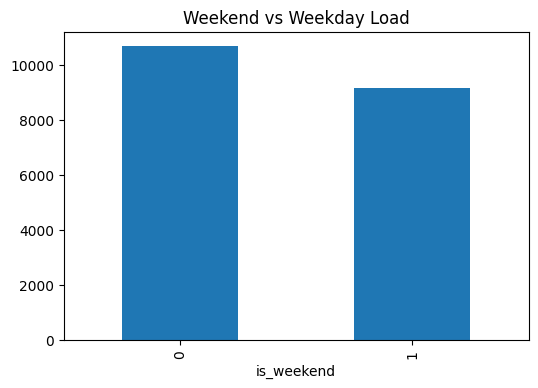

In [35]:
data.groupby("is_weekend")["load"].mean().plot(kind="bar", figsize=(6,4),
                                               title="Weekend vs Weekday Load");


In [36]:
num_cols = [
    "load","temperature","radiation_direct_horizontal",
    "lag_1","lag_24","roll_24","roll_72",
    "hour","dayofweek","month"
]

corr = data[num_cols].corr()
corr


,load,temperature,radiation_direct_horizontal,lag_1,lag_24,roll_24,roll_72,hour,dayofweek,month
load,1.000000,0.037283,0.032113,0.391956,0.674784,0.762639,0.751741,0.034967,-0.040438,-0.013730
temperature,0.037283,1.000000,0.509187,0.037662,0.029714,0.038124,0.025324,0.062770,0.005000,0.221299
radiation_direct_horizontal,0.032113,0.509187,1.000000,0.031623,0.006766,0.013097,-0.014685,-0.065130,-0.002062,-0.031507
lag_1,0.391956,0.037662,0.031623,1.000000,0.461775,0.758812,0.751998,0.041644,-0.040123,-0.013743
lag_24,0.674784,0.029714,0.006766,0.461775,1.000000,0.744818,0.754134,0.045238,-0.021060,-0.013751
roll_24,0.762639,0.038124,0.013097,0.758812,0.744818,1.000000,0.989954,0.048997,-0.041729,-0.018084
roll_72,0.751741,0.025324,-0.014685,0.751998,0.754134,0.989954,1.000000,0.024767,-0.021081,-0.018259
hour,0.034967,0.062770,-0.065130,0.041644,0.045238,0.048997,0.024767,1.000000,0.000146,-0.000269
dayofweek,-0.040438,0.005000,-0.002062,-0.040123,-0.021060,-0.041729,-0.021081,0.000146,1.000000,0.002622
month,-0.013730,0.221299,-0.031507,-0.013743,-0.013751,-0.018084,-0.018259,-0.000269,0.002622,1.000000


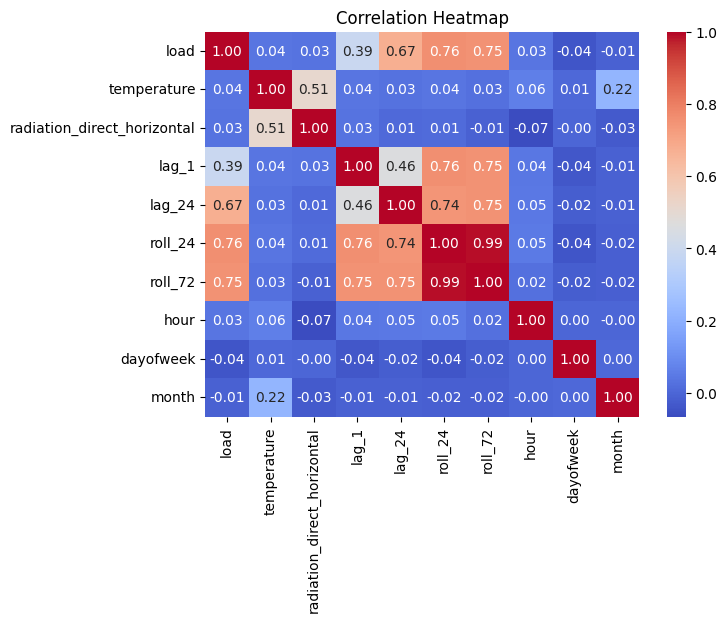

In [37]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [38]:
data["temp_squared"] = data["temperature"] ** 2


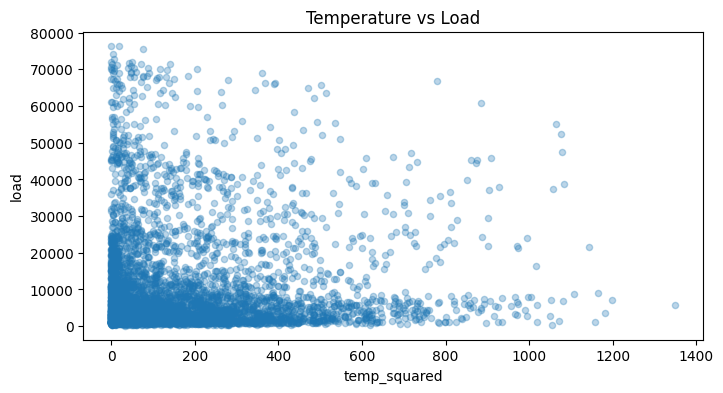

In [39]:
data.sample(5000).plot.scatter(x="temp_squared", y="load",
                               alpha=0.3, figsize=(8,4),
                               title="Temperature vs Load");

In [40]:
data["rad_x_hour"] = data["radiation_direct_horizontal"] * data["hour"]


<Axes: title={'center': 'rad_x_hour vs Load'}, xlabel='rad_x_hour', ylabel='load'>

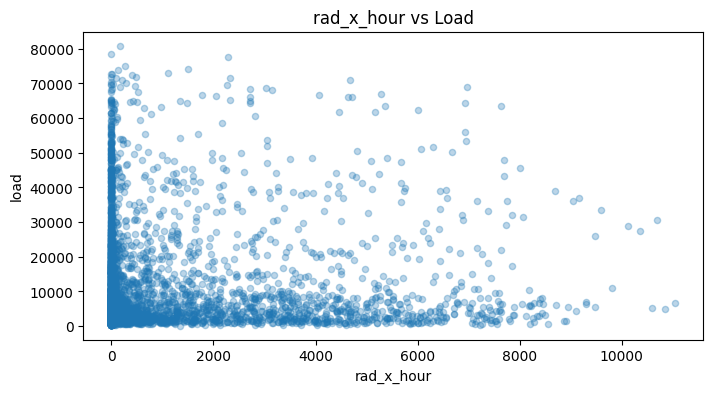

In [41]:
data.sample(5000).plot.scatter(
    x="rad_x_hour", y="load",
    alpha=0.3, figsize=(8,4),
    title="rad_x_hour vs Load"
)


<Axes: title={'center': 'rad_x_hour vs Load'}, xlabel='rad_x_hour', ylabel='load'>

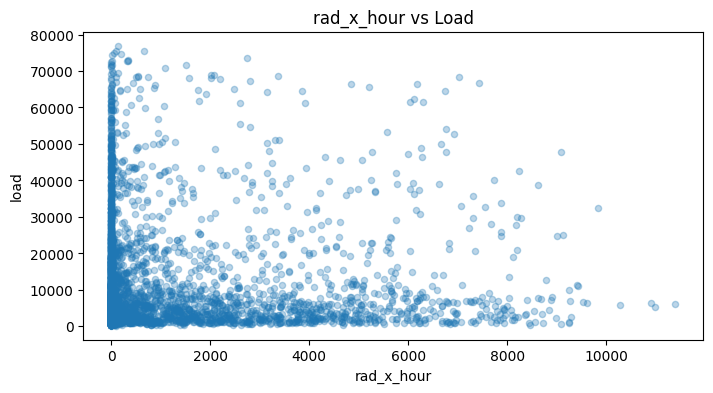

In [42]:
data.sample(5000).plot.scatter(
    x="rad_x_hour", y="load",
    alpha=0.3, figsize=(8,4),
    title="rad_x_hour vs Load"
)


In [43]:
data["delta_1"] = data["load"] - data["lag_1"]
data["delta_24"] = data["load"] - data["lag_24"]


In [44]:
data = data.dropna().reset_index(drop=True)


<Axes: title={'center': 'delta_1 (1-hour change) vs Load'}, xlabel='delta_1', ylabel='load'>

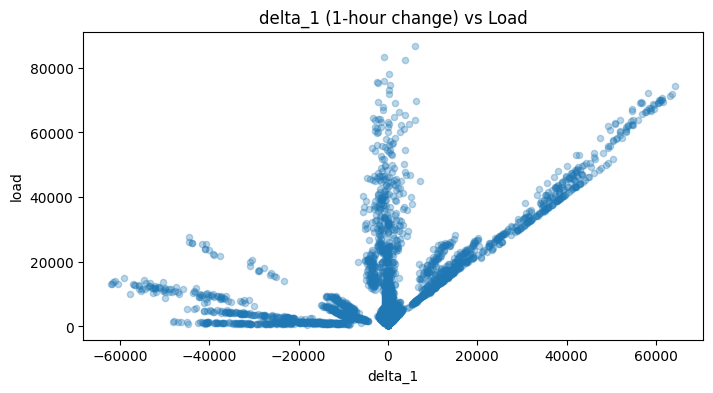

In [45]:
data.sample(5000).plot.scatter(
    x="delta_1", y="load",
    alpha=0.3, figsize=(8,4),
    title="delta_1 (1-hour change) vs Load"
)


<Axes: title={'center': 'delta_24 (24-hour change) vs Load'}, xlabel='delta_24', ylabel='load'>

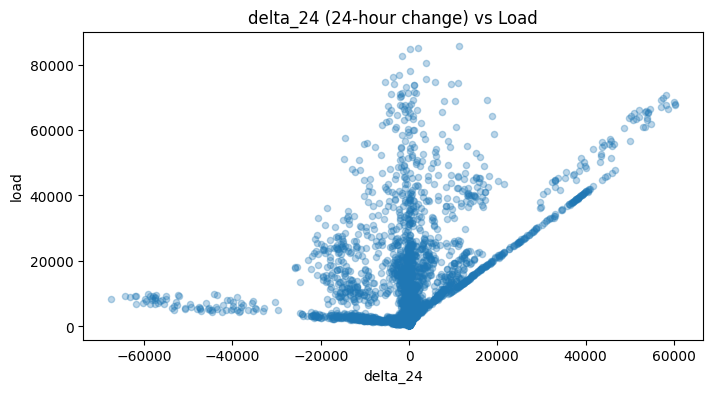

In [46]:
data.sample(5000).plot.scatter(
    x="delta_24", y="load",
    alpha=0.3, figsize=(8,4),
    title="delta_24 (24-hour change) vs Load"
)


In [47]:
data["country_code"] = data["country"].astype("category").cat.codes
data[["country","country_code"]].sample(10)


,country,country_code
332620,DE,5
1403470,IT,16
583412,EE,7
1149481,IT,16
1219143,IT,16
1466896,LU,18
1360273,IT,16
1999478,SE,25
980119,HU,14
2025833,SE,25


In [48]:
target = "load"

features = [
    # categorical/time
    "country_code","hour","dayofweek","month","is_weekend",

    # autoregressive memory
    "lag_1","lag_24","roll_24","roll_72",

    # weather effects
    "temperature","temp_squared",
    "radiation_direct_horizontal","rad_x_hour",

    # demand change indicators
    "delta_1","delta_24"
]
data_small = data.sample(500000)
X = data_small[features]
y = data_small[target]

X.shape, y.shape


((500000, 15), (500000,))

In [49]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib


In [50]:
tscv = TimeSeriesSplit(n_splits=5)


In [51]:
def build_pipeline(model):
    return Pipeline(steps=[
        ("model", model)
    ])


In [52]:

models = {
    "RandomForest": RandomForestRegressor(
        n_estimators=100, max_depth=16, random_state=42, n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3
    ),
    "XGBoost_GPU": XGBRegressor(
        n_estimators=350,
        learning_rate=0.08,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        tree_method="gpu_hist",     # << GPU training
        predictor="gpu_predictor",  # << GPU inference
        n_jobs=-1
    )
}


In [54]:
results = {}

for name, model in models.items():
    pipe = build_pipeline(model)

    preds, trues = [], []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        preds.extend(y_pred)
        trues.extend(y_test)

    mae = mean_absolute_error(trues, preds)
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((np.array(trues)-np.array(preds))/np.array(trues))) * 100

    results[name] = {"MAE": mae, "RMSE": rmse, "MAPE": mape}

    print(f"\n{name}")
    print(f" MAE : {mae:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" MAPE: {mape:.2f}%")



RandomForest
 MAE : 42.51
 RMSE: 169.59
 MAPE: 0.82%

GradientBoosting
 MAE : 545.46
 RMSE: 940.48
 MAPE: 11.86%


c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboo


XGBoost_GPU
 MAE : 153.59
 RMSE: 306.11
 MAPE: 2.50%


In [55]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [56]:
tscv = TimeSeriesSplit(n_splits=3)


In [61]:
param_dist = {
    "n_estimators": [120, 160, 200, 240],
    "max_depth": [10, 14, 18, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}


In [62]:
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                     # tries 10 combinations (good balance)
    cv=tscv,
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X, y)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [10, 14, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,TimeSeriesSpl...est_size=None)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [68]:
best_rf = search.best_estimator_
print(best_rf)

RandomForestRegressor(max_features=None, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, n_jobs=-1,
                      random_state=42)


In [69]:
preds, trues = [], []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    preds.extend(y_pred)
    trues.extend(y_test)

mae = mean_absolute_error(trues, preds)
mse = mean_squared_error(trues, preds)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((np.array(trues)-np.array(preds)) / np.array(trues))) * 100

print("TUNED RF MAE :", mae)
print("TUNED RF RMSE:", rmse)
print("TUNED RF MAPE:", round(mape, 3), "%")


TUNED RF MAE : 30.311150209527035
TUNED RF RMSE: 150.57534388520511
TUNED RF MAPE: 0.524 %


In [71]:



import joblib
joblib.dump(best_rf, "random_forest_energy_consumption_prediction.pkl")

print("Saved ✔ random_forest_energy_final.pkl")


Saved ✔ random_forest_energy_final.pkl
